In [4]:
import os
os.chdir('/home/chris/PycharmProjects/hmm-master')
os.getcwd()

'/home/chris/PycharmProjects/hmm-master'

In [5]:
import numpy as np; np.seterr(divide='ignore')
import pandas as pd; pd.set_option('display.max_columns', 10); pd.set_option('display.width', 320)
import tqdm

from models.hidden_markov.hmm_gaussian_em import EMHiddenMarkov
from models.finance.backtest import Backtester
from models.finance.mpc_model import MPC
from utils.data_prep import load_data_get_ret , load_data_get_logret, load_data
from utils.plotting.plot_asset_vals import plot_performance

import warnings
warnings.filterwarnings('ignore')

,excess_return,std,sharpe,max_drawdown,calmar_ratio
MSCI World,0.017,0.163,0.104,0.591,0.029
MSCI Emerging Markets,0.038,0.187,0.204,0.661,0.058
S&P 500,0.030,0.193,0.156,0.568,0.053
Oil,-0.073,0.391,-0.187,0.985,-0.074
Gold index,0.068,0.168,0.405,0.446,0.152
Barclays US Treasury,0.027,0.044,0.618,0.072,0.378
port_val,0.070,0.118,0.595,0.245,0.286


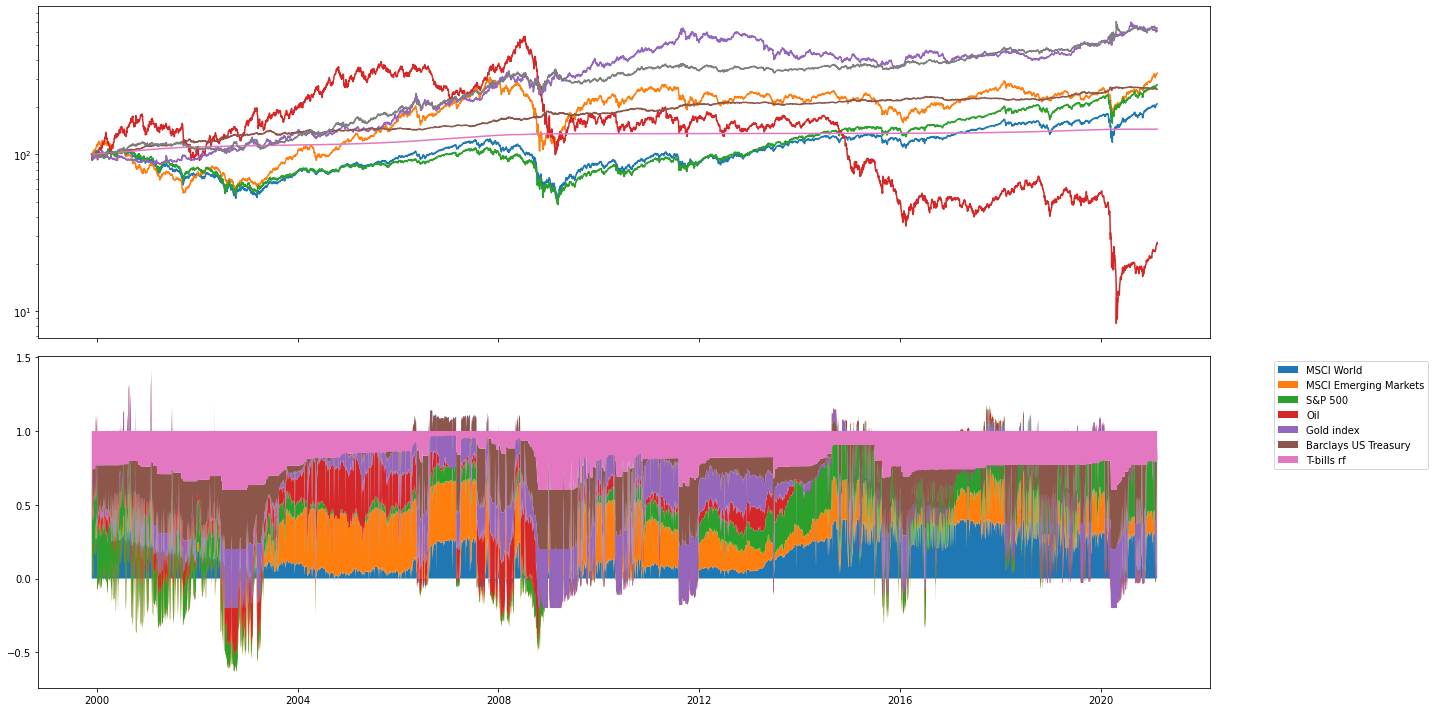

(<Figure size 1440x720 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

In [7]:
path = './analysis/portfolio_exercise/output_data/'

df_logret = load_data_get_logret('./data/price_series.csv')
X = df_logret["MSCI World"]

model1 = EMHiddenMarkov(n_states=2, init="random", random_state=42, epochs=20, max_iter=50)
backtester = Backtester()

#preds, cov = backtester.rolling_preds_cov_from_hmm(X, df_logret, model1, window_len=1500, shrinkage_factor=(0.3, 0.3), verbose=True)
#np.save(path + 'rolling_preds.npy', preds)
#np.save(path + 'rolling_cov.npy', cov)

#df_ret = load_data_get_ret()
#preds = np.load(path + 'rolling_preds.npy')
#cov = np.load(path + 'rolling_cov.npy')

#weights, port_val, gamma = backtester.backtest_mpc(df_ret, preds, cov)

#np.save(path + 'mpc_weights.npy', weights)
#np.save(path + 'port_val.npy', port_val)
#np.save(path + 'gamma.npy', gamma)

weights = np.load(path + 'mpc_weights.npy')
port_val = np.load(path + 'port_val.npy')
df = load_data('./data/price_series.csv')

metrics = backtester.performance_metrics(df, port_val, compare_assets=True)
display(metrics.round(3))


df = df.iloc[-len(port_val):]
start = df.index[0]
end = df.index[-1]

plot_performance(df, port_val, weights)